In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
import random
sys.path.append('..')
from graph_generators import er_digraph_dale, draw_weighted_graph,\
plot_eigenvalue_spectra, reciprocitize
from threshold_network import threshold_network, show_movie
from IPython.display import HTML

In [23]:
N = 100
p = 0.02
p_exc = 0.5
graph = er_digraph_dale(N, p, p_exc)

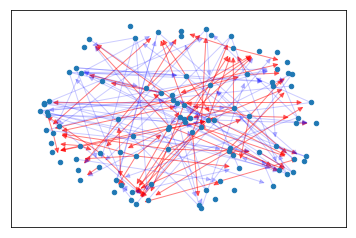

In [24]:
draw_weighted_graph(graph)
plt.show()

R'=0.400000


(-1, 1)

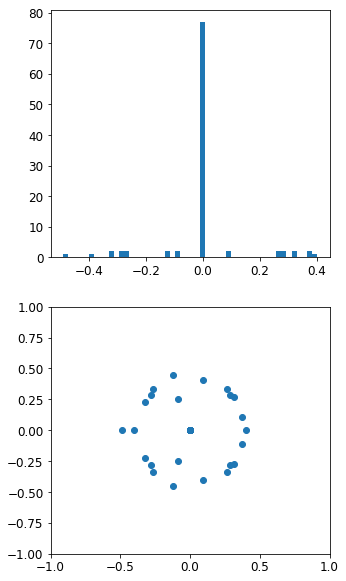

In [34]:
w0 = 4
W = nx.to_numpy_matrix(graph)
W = w0*W/np.sqrt(N)
lam, v = np.linalg.eig(W)
print("R'={0:06f}".format(np.max(lam.real)))
plot_eigenvalue_spectra(lam)
plt.xlim(-1,1)
plt.ylim(-1,1)

In [28]:
p_reci = 0.2
graph_reci = reciprocitize(graph, p_reci)

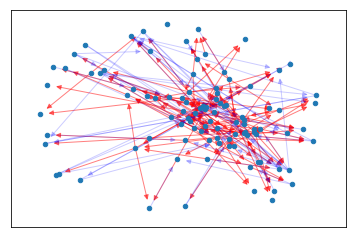

In [28]:
draw_weighted_graph(graph_reci)
plt.show()

R'=0.505364


(-1, 1)

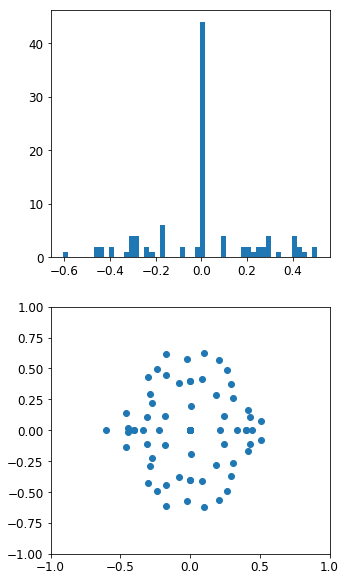

In [61]:
w0 = 4
W = nx.to_numpy_matrix(graph_reci)
W = w0*W/np.sqrt(N)
lam, v = np.linalg.eig(W)
print("R'={0:06f}".format(np.max(lam.real)))
plot_eigenvalue_spectra(lam)
plt.xlim(-1,1)
plt.ylim(-1,1)

In [71]:
r0 = np.array([random.randrange(2) for i in range(N)])

In [57]:
r0 = np.array([1, 1])
W = np.array([[1, 1],[-1, 0]])

In [72]:
tstep = 100
thresh = 0
r = threshold_network(r0, W/np.sqrt(N), thresh, tstep)

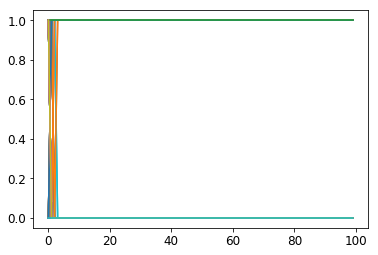

In [73]:
plt.plot(r[0:100,:].transpose())
plt.show()

In [74]:
xx = int(np.sqrt(N))
yy = int(N / xx)
movie = np.reshape(r, (xx, yy, tstep))
print('making movie ...')
ani = show_movie(movie[:, :, :200])
HTML(ani.to_html5_video())

making movie ...


In [67]:
np.save('oscilating_weight.npy', W)
np.save('oscilating_r0', r0)